# Real Estate Sales Records in NYC

##### Attached, you will find a dataset, containing real estate sales records in NYC. Using this dataset, we ask that you perform a few tasks and share your work with us. Overall, we expect this project would take 3-6 hours to complete, depending on your preferences and familiarity with the underlying concepts. 
1.	Perform exploratory analysis on this dataset and produce a showcase/storyline of a few interesting patterns and your observations. You will walk us through your findings during our session. You may use any tool you like, but a Jupyter notebook using Python is a common choice. 
2.	Build a simple model (e.g. regression or any type of ML model) that can predict SALE_PRICE of a given case given all the other columns available in the dataset. Feel free to use any techniques and intermediate steps you deem useful in this effort. Analyze your model, its performance/characteristics/diagnostics, any interesting findings (for example, what factors affect prices the most)
Important Note: Please be prepared to discuss the approach in more detail and some ways in which your initial attempt can be further enhanced. In addition to that, please explain/interpret all the things you have done during this project. 
In your project, you may consider doing the following: 
1.	Check for data types, convert if improper data type (e.x., converting date data types)
2.	Explore for missing values, make corrections
3.	Check for outliers
4.	Check if there are any duplicates
5.	Check for logically redundant features
6.	Check for feature scaling
7.	Train different models: Linear regression models, Random Forest regressor, XGBoost regressor
8.	Evaluate your models

About the data: 
You can obtain the data and information about the data from https://www.nyc.gov/site/finance/taxes/glossary-property-sales.page

Borough: The name of the borough in which the property is located.

Neighborhood: Department of Finance assessors determine the neighborhood name in the course of valuing properties. The common name of the neighborhood is generally the same as the name Finance designates. However, there may be slight differences in neighborhood boundary lines and some sub-neighborhoods may not be included.
Building Class Category: This is a field that we are including so that users of the Rolling Sales Files can easily identify similar properties by broad usage (e.g. One Family Homes) without looking up individual Building Classes. Files are sorted by Borough, Neighborhood, Building Class Category, Block and Lot.

Tax Class at Present: Every property in the city is assigned to one of four tax classes (Classes 1, 2, 3, and 4), based on the use of the property.
•	Class 1: Includes most residential property of up to three units (such as one-, two-, and three-family homes and small stores or offices with one or two attached apartments), vacant land that is zoned for residential use, and most condominiums that are not more than three stories.
•	Class 2: Includes all other property that is primarily residential, such as cooperatives and condominiums.
•	Class 3: Includes property with equipment owned by a gas, telephone or electric company.
•	Class 4: Includes all other properties not included in class 1,2, and 3, such as offices, factories, warehouses, garage buildings, etc.

Block: A Tax Block is a sub-division of the borough on which real properties are located. The Department of Finance uses a Borough-Block-Lot classification to label all real property in the City. “Whereas” addresses describe the street location of a property, the block and lot distinguishes one unit of real property from another, such as the different condominiums in a single building. Also, block and lots are not subject to name changes based on which side of the parcel the building puts its entrance on.

Lot: A Tax Lot is a subdivision of a Tax Block and represents the property unique location.

Easement: An easement is a right, such as a right of way, which allows an entity to make limited use of another’s real property. For example: MTA railroad tracks that run across a portion of another property.
Building Class at Present: The Building Classification is used to describe a property’s constructive use. The first position of the Building Class is a letter that is used to describe a general class of properties (for example “A” signifies one-family homes, “O” signifies office buildings. “R” signifies condominiums). The second position, a number, adds more specific information about the property’s use or construction style (using our previous examples “A0” is a Cape Cod style one family home, “O4” is a tower type office building and “R5” is a commercial condominium unit). The term Building Class used by the Department of Finance is interchangeable with the term Building Code used by the Department of Buildings. See NYC Building Classifications.
Address: The street address of the property as listed on the Sales File. Coop sales include the apartment number in the address field.

Zip Code: The property’s postal code.

Residential Units: The number of residential units at the listed property.

Commercial Units: The number of commercial units at the listed property.

Total Units: The total number of units at the listed property.

Land Square Feet: The land area of the property listed in square feet.

Gross Square Feet: The total area of all the floors of a building as measured from the exterior surfaces of the outside walls of the building, including the land area and space within any building or structure on the property.

Year Built: Year the structure on the property was built.

Building Class at Time of Sale: The Building Classification is used to describe a property’s constructive use. The first position of the Building Class is a letter that is used to describe a general class of properties (for example “A” signifies one-family homes, “O” signifies office buildings. “R” signifies condominiums). The second position, a number, adds more specific information about the property’s use or construction style (using our previous examples “A0” is a Cape Cod style one family home, “O4” is a tower type office building and “R5” is a commercial condominium unit). The term Building Class as used by the Department of Finance is interchangeable with the term Building Code as used by the Department of Buildings.

Sales Price: Price paid for the property.

Sale Date: Date the property sold.

$0 Sales Price: A $0 sale indicates that there was a transfer of ownership without a cash consideration. There can be a number of reasons for a $0 sale including transfers of ownership from parents to children.

### 1.a -Import the libraries:

In [38]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import warnings
#warnings.filterwarnings("ignore")

### 1.b - Read the data:

In [39]:
df = pd.read_csv("C:\\Users\\ridva\\OneDrive\\Masaüstü\\New folder (2)\\2023 Projects\\nyc-rolling-sales-1.csv", index_col=False)

### 1.c - Explore your data using methods such as head(), describe(), and info(). These methods will show you the first few rows of your data, summary statistics, and information about the data types:

In [40]:
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [41]:
df.columns

Index(['Unnamed: 0', 'BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'],
      dtype='object')

In [42]:
df.describe()

,Unnamed: 0,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE
count,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000
mean,10344.359878,2.998758,4237.218976,376.224015,10731.991614,2.025264,0.193559,2.249184,1789.322976,1.657485
std,7151.779436,1.289790,3568.263407,658.136814,1290.879147,16.721037,8.713183,18.972584,537.344993,0.819341
min,4.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4231.000000,2.000000,1322.750000,22.000000,10305.000000,0.000000,0.000000,1.000000,1920.000000,1.000000
50%,8942.000000,3.000000,3311.000000,50.000000,11209.000000,1.000000,0.000000,1.000000,1940.000000,2.000000
75%,15987.250000,4.000000,6281.000000,1001.000000,11357.000000,2.000000,0.000000,2.000000,1965.000000,2.000000
max,26739.000000,5.000000,16322.000000,9106.000000,11694.000000,1844.000000,2261.000000,2261.000000,2017.000000,4.000000


In [43]:
df.shape

(84548, 22)

In [44]:
df.dtypes

Unnamed: 0                         int64
BOROUGH                            int64
NEIGHBORHOOD                      object
BUILDING CLASS CATEGORY           object
TAX CLASS AT PRESENT              object
BLOCK                              int64
LOT                                int64
EASE-MENT                         object
BUILDING CLASS AT PRESENT         object
ADDRESS                           object
APARTMENT NUMBER                  object
ZIP CODE                           int64
RESIDENTIAL UNITS                  int64
COMMERCIAL UNITS                   int64
TOTAL UNITS                        int64
LAND SQUARE FEET                  object
GROSS SQUARE FEET                 object
YEAR BUILT                         int64
TAX CLASS AT TIME OF SALE          int64
BUILDING CLASS AT TIME OF SALE    object
SALE PRICE                        object
SALE DATE                         object
dtype: object

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

In [46]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [47]:
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [48]:
data1=df[['BOROUGH', 
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'SALE PRICE', 'SALE DATE']]

In [49]:
data1.head()

,BOROUGH,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE,SALE DATE
0,1,5,0,5,1633,6440,1900,6625000,2017-07-19 00:00:00
1,1,28,3,31,4616,18690,1900,-,2016-12-14 00:00:00
2,1,16,1,17,2212,7803,1900,-,2016-12-09 00:00:00
3,1,10,0,10,2272,6794,1913,3936272,2016-09-23 00:00:00
4,1,6,0,6,2369,4615,1900,8000000,2016-11-17 00:00:00


#### 1.d -Check for missing Value

In [50]:
data1.isnull().sum()

BOROUGH              0
RESIDENTIAL UNITS    0
COMMERCIAL UNITS     0
TOTAL UNITS          0
LAND SQUARE FEET     0
GROSS SQUARE FEET    0
YEAR BUILT           0
SALE PRICE           0
SALE DATE            0
dtype: int64

In [51]:
data1['SALE PRICE'].unique()

array(['6625000', ' -  ', '3936272', ..., '408092', '11693337', '69300'],
      dtype=object)

In [54]:
data1['SALE PRICE'] = data1['SALE PRICE'].replace(' - ', np.NaN)

<ipython-input-54-85e87edef7c2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['SALE PRICE'] = data1['SALE PRICE'].replace(' - ', np.NaN)


#### 1.e - Visualize your data using various plots. For example, you can use histograms to explore the distribution of a numerical variable:

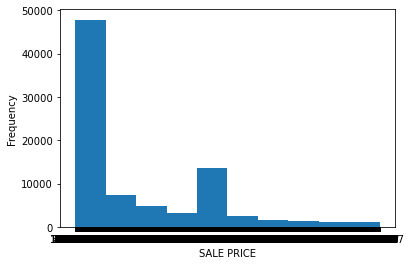

In [13]:
import matplotlib.pyplot as plt

plt.hist(df['SALE PRICE'], bins=10)
plt.xlabel('SALE PRICE')
plt.ylabel('Frequency')
plt.show()

#### 1.f- Look for relationships between variables. You can use scatter plots to explore the relationship between two numerical variables:

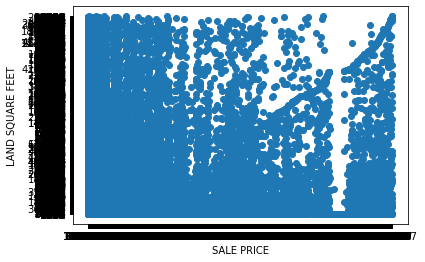

In [14]:
plt.scatter(df['SALE PRICE'], df['LAND SQUARE FEET'])
plt.xlabel('SALE PRICE')
plt.ylabel('LAND SQUARE FEET')
plt.show()

#### 1.g- Explore relationships between categorical and numerical variables. For example, you can use box plots to compare the distribution of a numerical variable across different categories:

TypeError: ufunc 'true_divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

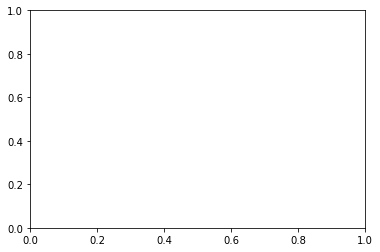

In [15]:
plt.boxplot([df[df['BUILDING CLASS CATEGORY'] == category]['SALE PRICE'] for category in df['BUILDING CLASS CATEGORY'].unique()])
plt.xticks(range(1, len(df['BUILDING CLASS CATEGORY'].unique()) + 1), df['BUILDING CLASS CATEGORY'].unique())
plt.xlabel('BUILDING CLASS CATEGORY')
plt.ylabel('SALE PRICE')
plt.show()

### 2- Missing Values and Make Corrections

### 3- Check for Outliers

#### To check for outliers in your data, one approach is to use box plots, which provide a visual representation of the distribution of a variable and help identify any data points that are significantly higher or lower than the majority of the data. Here's some sample code to create box plots for the sale price and gross square feet variables:

In [28]:
import seaborn as sns

sns.boxplot(x=df['SALE PRICE'])
plt.xlabel('Sale Price')
plt.show()

sns.boxplot(x=df['GROSS SQUARE FEET'])
plt.xlabel('Gross Square Feet')
plt.show()

TypeError: Horizontal orientation requires numeric `x` variable.

#### You can also use the z-score method to identify outliers. The z-score measures how many standard deviations a data point is from the mean. Data points with a z-score greater than a certain threshold (e.g., 3) are considered outliers. Here's some sample code to calculate the z-scores for the sale price and gross square feet variables:

In [32]:
from scipy import stats

z_scores_sale_price = stats.zscore(df['SALE PRICE'])
z_scores_sale_price

z_scores_gross_square_feet = stats.zscore(df['GROSS SQUARE FEET'])
z_scores_gross_square_feet

TypeError: unsupported operand type(s) for /: 'str' and 'int'

#### You can then create a Boolean mask to identify the data points with z-scores greater than the threshold:

In [33]:
z_threshold = 3

outliers_sale_price = (abs(z_scores_sale_price) > z_threshold)
outliers_sale_price

outliers_gross_square_feet = (abs(z_scores_gross_square_feet) > z_threshold)
outliers_gross_square_feet

NameError: name 'z_scores_sale_price' is not defined

#### This will create two Boolean masks (outliers_sale_price and outliers_gross_square_feet) that indicate which data points are outliers. You can then use these masks to extract the outlier data points and further investigate them.

### 4- Check if there are any duplicates

#### To check for duplicates in your data, you can use the duplicated method in pandas, which returns a Boolean mask indicating whether each row is a duplicate of a previous row. Here's some sample code to check for duplicates:

In [34]:

duplicates = df.duplicated()
duplicates
num_duplicates = duplicates.sum()
num_duplicates

0

#### This will print a Boolean mask indicating whether each row is a duplicate and the total number of duplicates in the data. If there are duplicates, you can use the drop_duplicates method to remove them:

In [35]:
df = df.drop_duplicates()

### 5.	Check for logically redundant features

#### To check for logically redundant features in your data, you can look for variables that are highly correlated with each other. Highly correlated variables can indicate that one variable is redundant because it is providing essentially the same information as another variable. Here's some sample code to calculate the correlation matrix for all numeric variables in your data:

In [ ]:
# Select only numeric variables
numeric_vars = df.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
corr_matrix = numeric_vars.corr()
print(corr_matrix)

#### This will print the correlation matrix for all numeric variables. You can then use a heatmap to visualize the correlation matrix:

In [ ]:
import seaborn as sns

# Create a heatmap of the correlation matrix
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, annot=True)
plt.show()

#### This will create a heatmap of the correlation matrix, where the color of each cell represents the strength and direction of the correlation between two variables. Variables with a high positive correlation (closer to 1) or a high negative correlation (closer to -1) may be redundant with each other.

You can also use the variance inflation factor (VIF) to quantify the degree of multicollinearity between two variables. The VIF measures how much the variance of the estimated regression coefficients is increased due to multicollinearity. Here's some sample code to calculate the VIF for all numeric variables in your data:

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate the VIF for all numeric variables
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(numeric_vars.values, i) for i in range(numeric_vars.shape[1])]
vif["features"] = numeric_vars.columns
print(vif)

#### This will print the VIF for all numeric variables. Variables with a high VIF (greater than 5 or 10, depending on the context) may be redundant with each other.

### 6.	Check for feature scaling

#### Feature scaling is the process of transforming the data to a similar scale. If the features are not on a similar scale, some machine learning algorithms may give more weight to features with larger values, which can cause problems with the model's accuracy. To check for feature scaling, you can look at the distribution of each variable in your data. Here's some sample code to create a histogram of each variable:

In [ ]:
# Create a histogram of each variable
df.hist(figsize=(20, 20))
plt.show()

#### This will create a histogram of each variable in your data. If the variables are on a similar scale, they should have a similar range and distribution. If some variables have a much larger range or a different distribution, you may need to apply feature scaling.

There are two common methods for feature scaling: normalization and standardization. Normalization scales the data so that all values are between 0 and 1, while standardization scales the data so that it has a mean of 0 and a standard deviation of 1. Here's some sample code to apply normalization and standardization to your data:

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Normalize the data
scaler = MinMaxScaler()
df_norm = scaler.fit_transform(df)

# Standardize the data
scaler = StandardScaler()
df_std = scaler.fit_transform(df)

#### The MinMaxScaler and StandardScaler classes from sklearn.preprocessing can be used to apply normalization and standardization, respectively. The resulting df_norm and df_std DataFrames will have the same shape as the original data, but with the values transformed to the desired scale.

### 7.	Train different models: Linear regression models, Random Forest regressor, XGBoost regressor

#### To train different models on your data, you first need to split your data into training and testing sets. This allows you to train the models on one set of data and evaluate their performance on another set of data that they have not seen before. Here's some sample code to split your data into a training set and a testing set:

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X = df.drop('SALE PRICE', axis=1)
y = df['SALE PRICE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### This will split your data into a training set (80% of the data) and a testing set (20% of the data).

Next, you can train different models on the training set and evaluate their performance on the testing set. Here's some sample code to train a linear regression model:

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Train a linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Evaluate the model on the testing set
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('Linear regression MSE:', mse)

#### This will train a linear regression model on the training set and evaluate its performance on the testing set using mean squared error (MSE).

Here's some sample code to train a random forest regressor:

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Train a random forest regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Evaluate the model on the testing set
y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('Random forest MSE:', mse)

#### This will train a random forest regressor on the training set and evaluate its performance on the testing set using MSE.

Here's some sample code to train an XGBoost regressor:

In [ ]:
import xgboost as xgb

# Convert the data to DMatrix format for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Train an XGBoost regressor
params = {'objective': 'reg:squarederror', 'seed': 42}
xgb_model = xgb.train(params=params, dtrain=dtrain, num_boost_round=100)

# Evaluate the model on the test set
y_pred = xgb_model.predict(dtest)
mse = mean_squared_error(y_test, y_pred)
print('XGBoost MSE:', mse)

#### This will train an XGBoost regressor on the training set and evaluate its performance on the test set using mean squared error (MSE) as the evaluation metric. Note that we first need to convert the data to DMatrix format for XGBoost.

### 8.	Evaluate your models

#### To evaluate the performance of the models, we can use various metrics depending on the problem at hand. In the case of regression, mean squared error (MSE) and R-squared are commonly used metrics.

Here's some sample code to evaluate the performance of the linear regression model:

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate the performance of the linear regression model
y_pred_lr = lr.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print('Linear Regression MSE:', mse_lr)
print('Linear Regression R-squared:', r2_lr)

#### This will compute the mean squared error and R-squared for the linear regression model on the test set.

Similarly, here's some sample code to evaluate the performance of the random forest regressor:

In [ ]:
# Evaluate the performance of the random forest regressor
y_pred_rf = rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print('Random Forest MSE:', mse_rf)
print('Random Forest R-squared:', r2_rf)

#### And here's some sample code to evaluate the performance of the XGBoost regressor:

In [ ]:
# Evaluate the performance of the XGBoost regressor
y_pred_xgb = xgb_model.predict(dtest)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print('XGBoost MSE:', mse_xgb)
print('XGBoost R-squared:', r2_xgb)

#### You can compare the performance of the different models based on these metrics. The lower the MSE and the higher the R-squared, the better the model is performing.